Binary Sentiment (Logistic Regression) (Task 4)

In [52]:
import pandas as pd

#Will have to change the file name for the single large dataset
data= pd.read_csv("cleaned_data.csv")

#Testing if it read from the read_csv
print(data.head(2))
print("\n")


   rating                       title_x  \
0     3.0                           Meh   
1     5.0  Great all natural ear swabs!   

                                                text  \
0  These were lightweight and soft but much too s...   
1  I really like these ear swabs. First they come...   

                                            images_x        asin parent_asin  \
0  [{'attachment_type': 'IMAGE', 'large_image_url...  B088SZDGXG  B08BBQ29N5   
1                                                 []  B07KG1TWP5  B07KG1TWP5   

                        user_id      timestamp  helpful_vote  \
0  AEYORY2AVPMCPDV57CE337YU5LXA  1634275259292             0   
1  AFSKPY37N3C43SOI5IEXEK5JSIYA  1596473351088             0   

   verified_purchase  ...                                             videos  \
0               True  ...  {'title': ['She loved them !', 'NEW FAUX 24 in...   
1              False  ...            {'title': [], 'url': [], 'user_id': []}   

      store  categories   

C:\Users\katoy\AppData\Local\Temp\ipykernel_13348\4113809095.py:4: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("cleaned_data.csv")


Transform rating into:
Positive if rating > 3, Negative if rating ≤ 3

In [53]:
Positive = data[data["rating"]>3]
Negative = data[data["rating"]<=3]
print(Positive.shape, Negative.shape)

(40499, 28) (10007, 28)


In [54]:
#Imbalanced results thus 

Positive= Positive.head(Negative.shape[0])
print(Positive.shape, Negative.shape)

(10007, 28) (10007, 28)


In [55]:
print("Rating Before Transformation")
print(data["rating"].head(10))
print("\n")

data["rating"] = data["rating"].apply(lambda r: "Positive" if r > 3 else "Negative")

print("Rating Before Transformation")
print(data["rating"].head(10))
print("\n")

#Update the csv at source
data.to_csv("cleaned_data.csv", index= False)

Rating Before Transformation
0    3.0
1    5.0
2    5.0
3    3.0
4    5.0
5    5.0
6    5.0
7    4.0
8    4.0
9    3.0
Name: rating, dtype: float64


Rating Before Transformation
0    Negative
1    Positive
2    Positive
3    Negative
4    Positive
5    Positive
6    Positive
7    Positive
8    Positive
9    Negative
Name: rating, dtype: object




Part a. Train/Test Split: 80% train, 20% test, randomly shuffled.

Using "text" and "rating" from the dataset to predict whether "rating" would be "Positve" or "Negative" based on the "text"

In [56]:
from sklearn.model_selection import train_test_split

X = data["text"]
y= data["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10, shuffle= True) 

#Testing
print("Total amount of data: ", len(X))
print("The amount of data in trained split: ", len(X_train))
print("The amount of data in test split: ", len(X_test))
print("Dataset before shuffle : ", X.head(5).tolist())
print("Dataset after shuffle : ", X_train.head(5).tolist())
print("\n")


Total amount of data:  50506
The amount of data in trained split:  40404
The amount of data in test split:  10102
Dataset before shuffle :  ['These were lightweight and soft but much too small for my liking. I would have preferred two of these together to make one loc. For that reason I will not be repurchasing.', "I really like these ear swabs. First they come in a large, handy box and are easy to store (will last a long time). Second, they are all organic and good for the environment. Third, they are strong and don't fall apart very easily. I highly recommend these over Q-Tips (which I have used for years).", 'To be honest, I rarely have used an overnight cream. Typically, my skin care routine is the same morning and night (wash, apply hyalauronic serum, and some kind of moistutrizer). So, when I saw this Iryasa cream I wanted to try it. Easy to apply, you can immediately feel the moisture starting to work. I do apply this about 30 minutes before I actually go to sleep to allow it ti

Part b. Text Vectorization: TF-IDF on review text (lowercase, split on whitespace/punctuation), discarding tokens in fewer than 5 reviews or in over 80% of reviews.

Preprocessing the text: lowercase, split on whitespace/punctuation

In [57]:
import re

print("Before preprocessing the text")
print(data["text"].head(2))
print("\n")

data["text"]= data["text"].apply(lambda word: re.findall(r'\b\w+\b', str(word).lower()))

print("After preprocessing the text")
print(data["text"].head(2))
print("\n")

#Update the csv at source
data.to_csv("cleaned_data.csv", index= False)

Before preprocessing the text
0    These were lightweight and soft but much too s...
1    I really like these ear swabs. First they come...
Name: text, dtype: object


After preprocessing the text
0    [these, were, lightweight, and, soft, but, muc...
1    [i, really, like, these, ear, swabs, first, th...
Name: text, dtype: object




TF-IDF on review text, discarding tokens in fewer than 5 reviews or in over 80% of reviews.


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(min_df=5, max_df=0.8)

#for missing values
X_train= X_train.fillna("")
X_test= X_test.fillna("")

X_train_tf_idf = tf_idf.fit_transform(X_train)
X_test_tf_idf = tf_idf.transform(X_test)

print("X_train_tf_idf", X_train_tf_idf.shape)
print("X_test_tf_idf", X_test_tf_idf.shape)

X_train_tf_idf (40404, 10420)
X_test_tf_idf (10102, 10420)


Part c. Classifier: Logistic Regression (default hyperparameters).

In [59]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()

model.fit(X_train_tf_idf, y_train)
prediction = model.predict(X_test_tf_idf)

for p in range(5):
    print(f"Review: {X_test.iloc[p]}")
    print(f"Predictions: {prediction[p]}")
    print("\n")

Review: My Doxie loved her gift,perfect for her birthday.
Predictions: Positive


Review: Got it as we are avid &#34;Law & Order&#34; (original series) fans and this only leaves the last three years to have the complete series.
Predictions: Positive


Review: Hubby loves these
Predictions: Positive


Review: Leaked from the gauge face out of the box.
Predictions: Positive


Review: Wonderful resource for finding out about new books, special author section every edtion, & book club choices.
Predictions: Positive




Evaluation: Accuracy, F1 Score and Confusion Matrix (2×2: TP, FP, TN, FN)

Accuracy:  0.88873490397941
F1 Score:  0.9323950439071335
Confusion Matrix: 


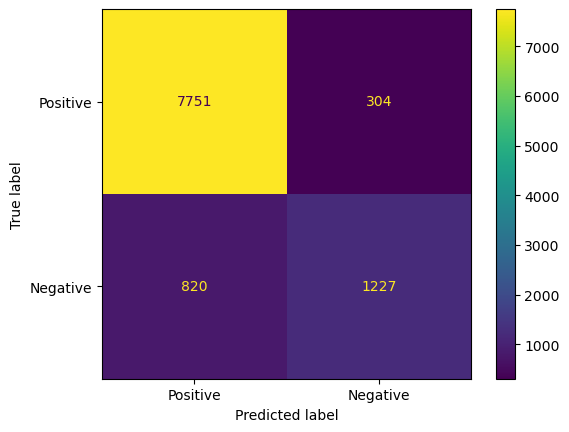

In [60]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

#Accuracy
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)

#F1 Score
f1_score=f1_score(y_test, prediction, pos_label="Positive")
print("F1 Score: ", f1_score)

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, prediction, labels=["Positive","Negative"])
#print("Confusion Matrix: ", confusion_matrix)

print("Confusion Matrix: ")
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Positive","Negative"])
confusion_matrix_display.plot()